In [39]:
%pylab inline
import seaborn as sns
import pandas as pd
import proplot as plot
from riboraptor.plotting import plot_framewise_counts, setup_axis
from scipy.stats import pearsonr, spearmanr
plot.rc.fontname = 'Arial'
plot.rc.large = 20
plot.rc.small = 16
plot.rc.ticklen = 10
plot.rc.tickratio = 0.5
plot.rc.linewidth = 2
plot.rc.margin = 0.1

Populating the interactive namespace from numpy and matplotlib


In [30]:
star_df = pd.read_csv("/staging/as/skchoudh/re-ribo-analysis/hg38/SRP231304/ribotricer_results/SRX7201741_translating_ORFs.tsv", sep="\t").set_index("ORF_ID")
kallisto_df = pd.read_csv("/staging/as/skchoudh/re-ribo-analysis/hg38/SRP231304_kallisto/ribotricer_results/SRX7201741_translating_ORFs.tsv", sep="\t").set_index("ORF_ID")

merged_df = star_df.merge(kallisto_df,  suffixes=['_star', '_kallisto'], left_index=True, right_index=True)


/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


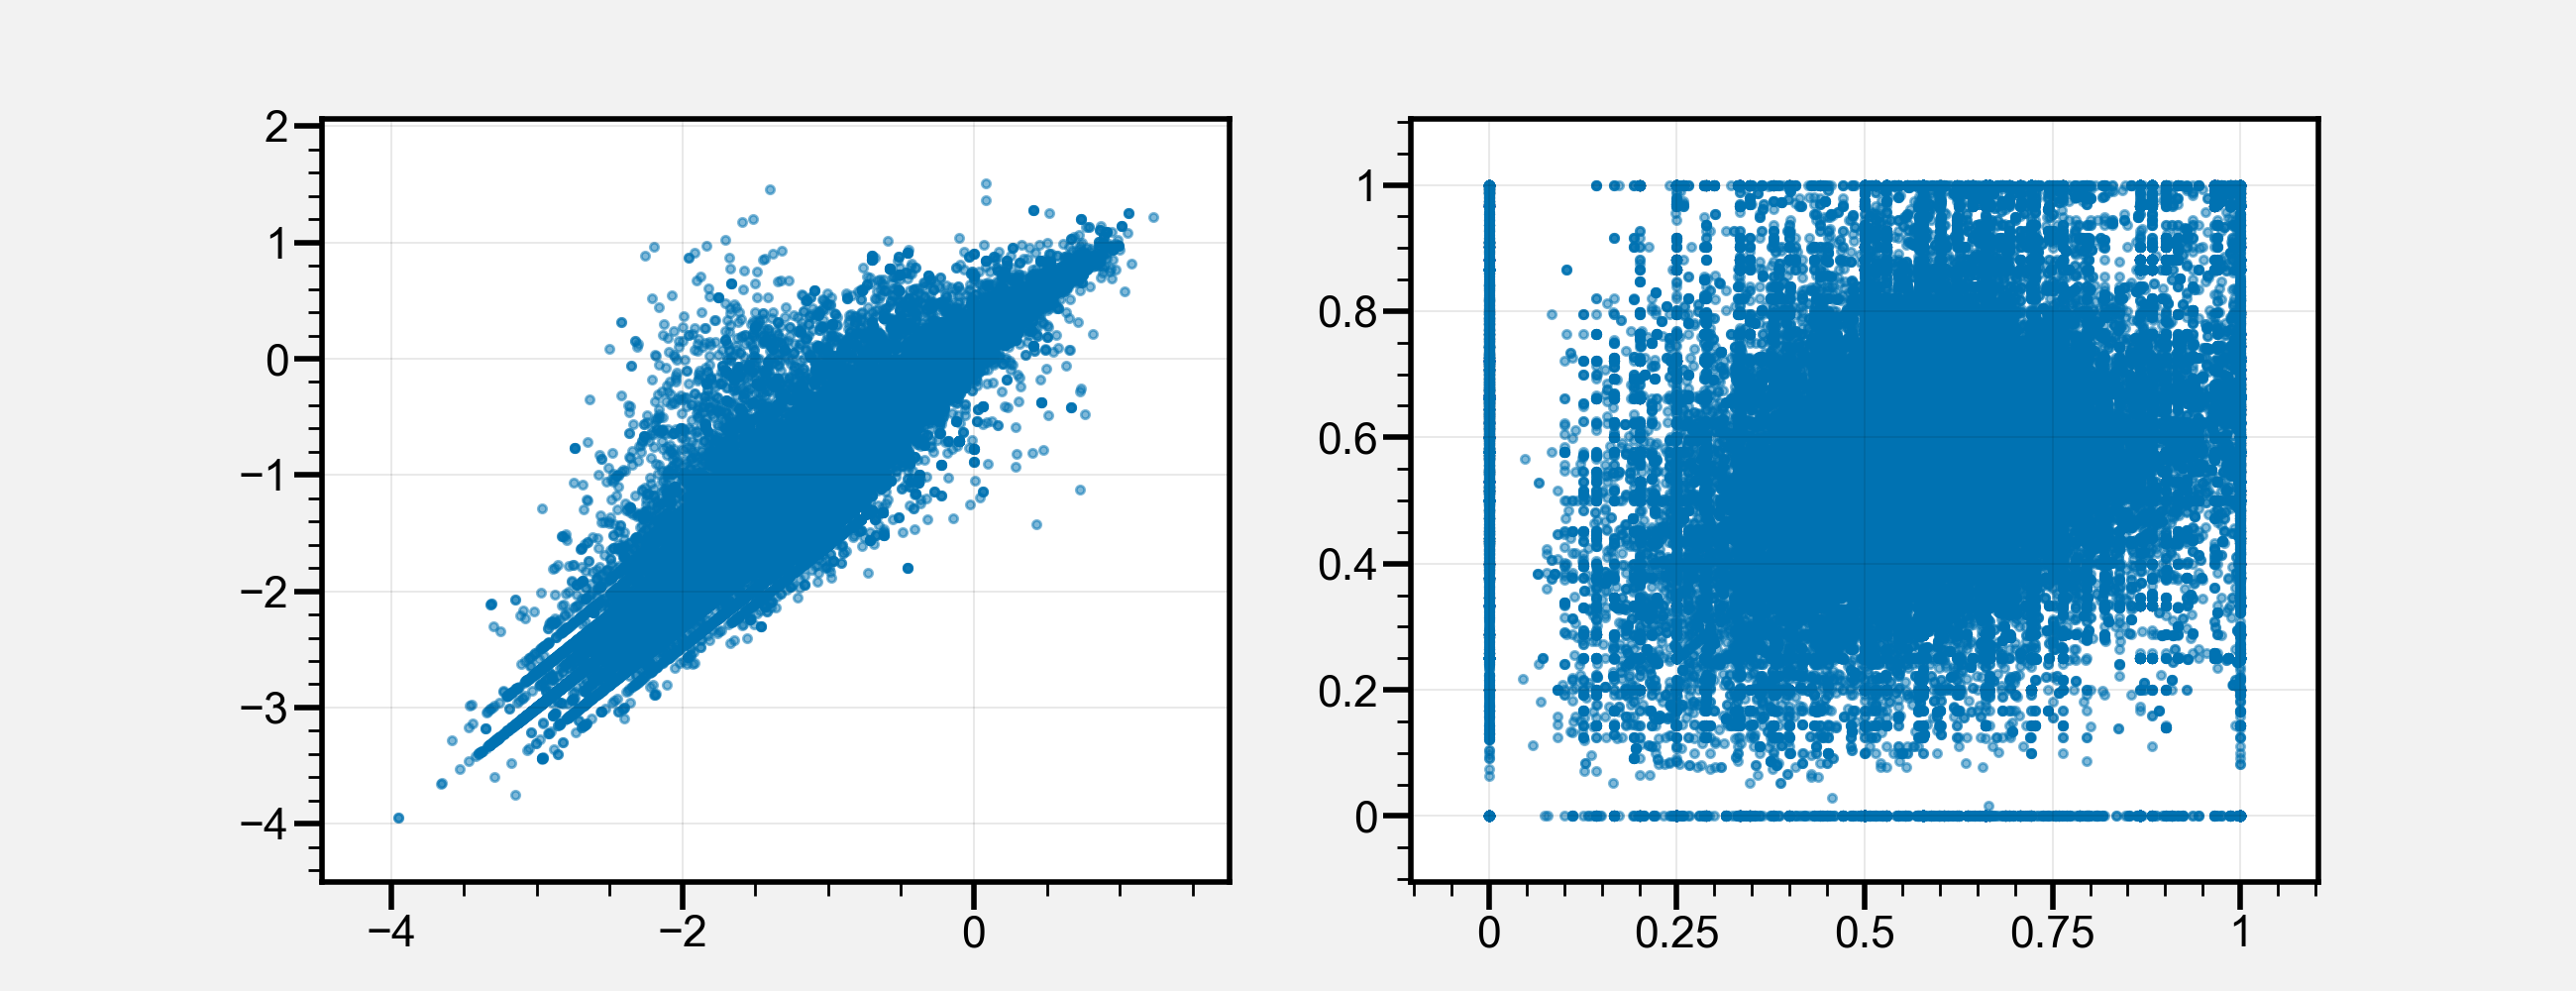

In [31]:
#merged_df.plot.scatter(x='read_density_star', y='read_density_kallisto', alpha=0.5, color='blue')#, logx=True, logy=True)
#fig, ax = plot.sub
#f, axs = plot.subplots(ncols=2, share=0)
fig, ax = plt.subplots(ncols=2, figsize=(13,5))
ax[0].scatter(x=np.log10(merged_df['read_density_star']), y=np.log10(merged_df['read_density_kallisto']), alpha=0.5)
#ax[0].set_xlim(-100, merged_df['read_density_star'].max())
#ax[0].set_ylim(-1, merged_df['read_density_kallisto'].max())
ax[1].scatter(x=merged_df['phase_score_star'], y=merged_df['phase_score_kallisto'], alpha=0.5)



In [38]:
spearmanr(merged_df['read_density_star'], merged_df['read_density_kallisto'])

SpearmanrResult(correlation=0.8642208792335617, pvalue=0.0)

In [33]:
pearsonr(merged_df['phase_score_star'], y=merged_df['phase_score_kallisto'])

(0.7642994501466364, 0.0)

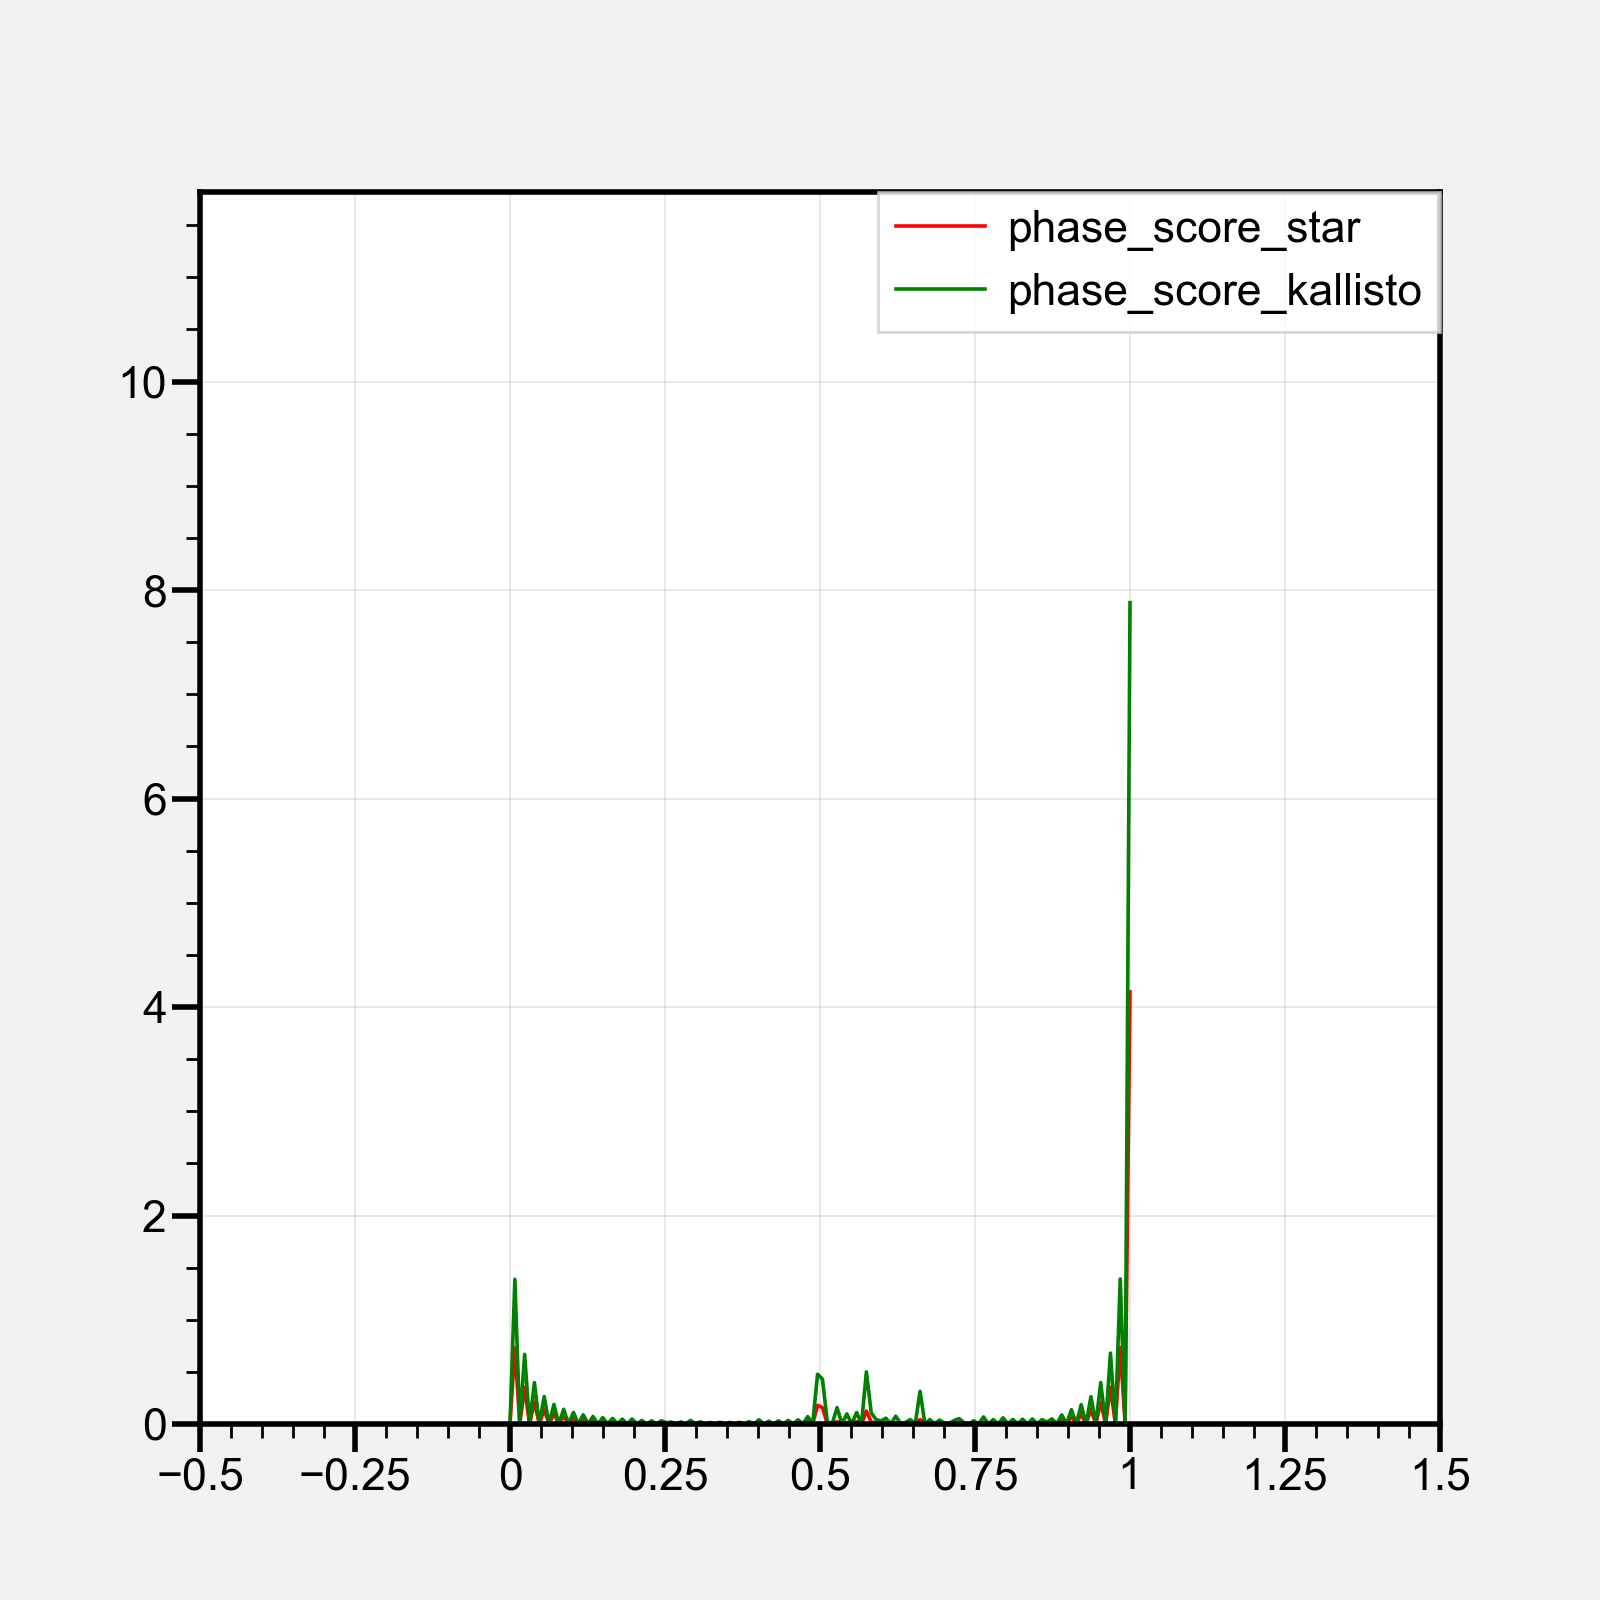

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(merged_df['phase_score_star'], color='red')
sns.kdeplot(merged_df['phase_score_kallisto'], color='green')



# Check for discordance

In [42]:
merged_df_discordant = merged_df[merged_df['status_star']!=merged_df['status_kallisto']]
merged_df_discordant

,ORF_type_star,status_star,phase_score_star,read_count_star,length_star,valid_codons_star,valid_codons_ratio_star,read_density_star,transcript_id_star,transcript_type_star,...,read_density_kallisto,transcript_id_kallisto,transcript_type_kallisto,gene_id_kallisto,gene_name_kallisto,gene_type_kallisto,chrom_kallisto,strand_kallisto,start_codon_kallisto,profile_kallisto
ORF_ID,,,,,,,,,,,,,,,,,,,,,
ENST00000428771_999062_999973_741,annotated,translating,0.512812,19,741,17,0.068826,0.076923,ENST00000428771,protein_coding,...,0.068826,ENST00000428771,protein_coding,ENSG00000188290,HES4,protein_coding,1,-,ATG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
ENST00000304952_999062_999973_663,annotated,translating,0.512812,19,663,17,0.076923,0.085973,ENST00000304952,protein_coding,...,0.072398,ENST00000304952,protein_coding,ENSG00000188290,HES4,protein_coding,1,-,ATG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
ENST00000484667_999062_999973_567,annotated,translating,0.461880,17,567,15,0.079365,0.089947,ENST00000484667,protein_coding,...,0.074074,ENST00000484667,protein_coding,ENSG00000188290,HES4,protein_coding,1,-,ATG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
ENST00000360001_1217515_1228793_1086,annotated,translating,0.626620,51,1086,35,0.096685,0.140884,ENST00000360001,protein_coding,...,0.154696,ENST00000360001,protein_coding,ENSG00000078808,SDF4,protein_coding,1,-,ATG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
ENST00000465727_1218624_1228793_762,annotated,translating,0.687386,32,762,20,0.078740,0.125984,ENST00000465727,nonsense_mediated_decay,...,0.141732,ENST00000465727,nonsense_mediated_decay,ENSG00000078808,SDF4,protein_coding,1,-,ATG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENST00000387347_2364_2444_81,novel,translating,0.458419,594,81,15,0.555556,22.000000,ENST00000387347,Mt_rRNA,...,0.000000,ENST00000387347,Mt_rRNA,ENSG00000210082,MT-RNR2,Mt_rRNA,MT,+,CTG,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
ENST00000387347_1871_1933_63,novel,translating,0.458541,24425,63,8,0.380952,1163.095238,ENST00000387347,Mt_rRNA,...,0.000000,ENST00000387347,Mt_rRNA,ENSG00000210082,MT-RNR2,Mt_rRNA,MT,+,ATA,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
ENST00000387347_2384_2455_72,novel,translating,0.496515,8235,72,15,0.625000,343.125000,ENST00000387347,Mt_rRNA,...,0.000000,ENST00000387347,Mt_rRNA,ENSG00000210082,MT-RNR2,Mt_rRNA,MT,+,ATC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


So the discordance seems to be arising because of missing entries in the annotation file for kallisto : If there was no annotation, there are no alignments there.

In [46]:
tx_ids_to_subset = pd.read_csv("/home/qcb-panasas/skchoudh/genomes/hg38/cdna/Homo_sapiens.GRCh38.cdna.all.ids.txt", header=None)[0].tolist()
merged_df_subset = merged_df.loc[merged_df.transcript_id_star.isin(tx_ids_to_subset)]



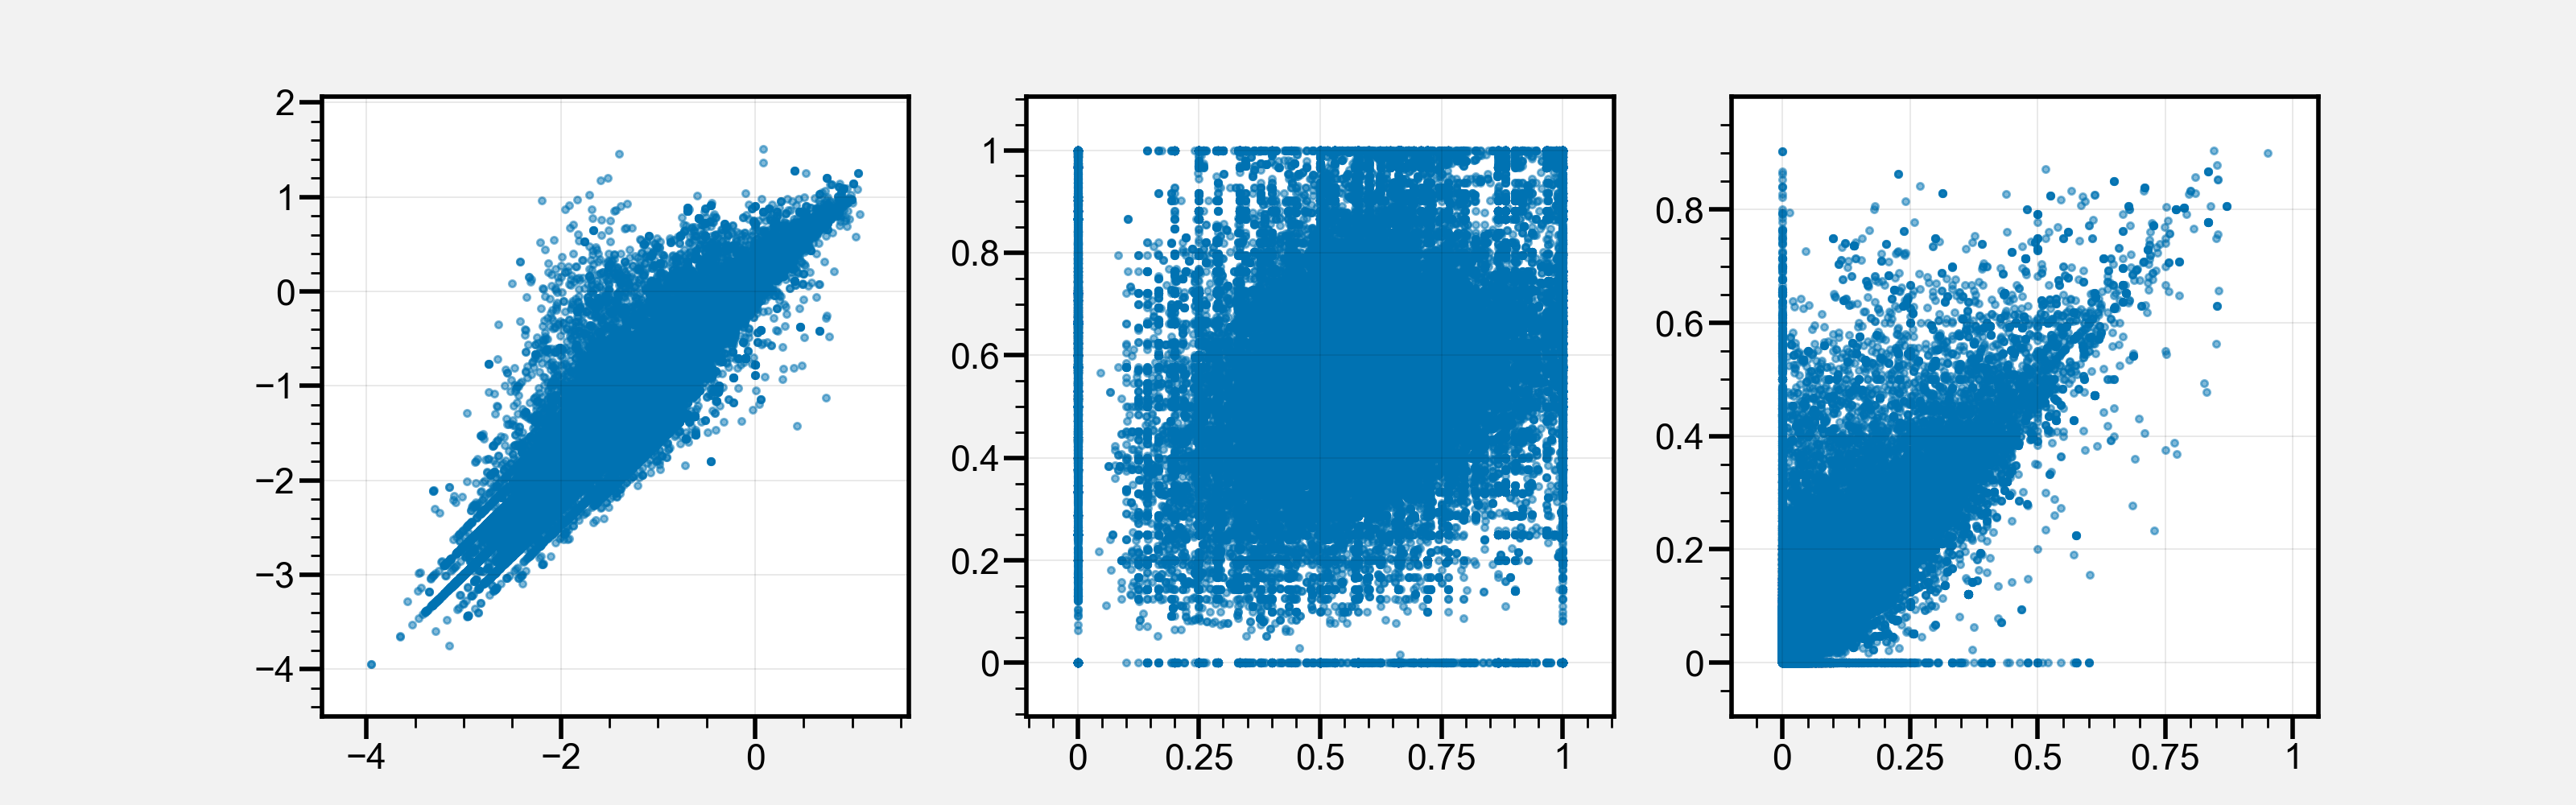

In [60]:
fig, ax = plt.subplots(ncols=3, figsize=(16,5))
ax[0].scatter(x=np.log10(merged_df_subset['read_density_star']), y=np.log10(merged_df_subset['read_density_kallisto']), alpha=0.5)
#ax[0].set_xlim(-100, merged_df['read_density_star'].max())
#ax[0].set_ylim(-1, merged_df['read_density_kallisto'].max())
ax[1].scatter(x=merged_df_subset['phase_score_star'], y=merged_df_subset['phase_score_kallisto'], alpha=0.5)
ax[2].scatter(x=merged_df_subset['valid_codons_ratio_star'], y=merged_df_subset['valid_codons_ratio_kallisto'], alpha=0.5)


In [48]:
pearsonr(merged_df_subset['read_density_star'], merged_df_subset['read_density_kallisto'])

(0.6595807436130615, 0.0)

In [50]:
pearsonr(merged_df_subset['phase_score_star'], y=merged_df_subset['phase_score_kallisto'])

(0.7687686825464, 0.0)

# Check discoradant again

In [57]:
merged_df_discordant = merged_df_subset[merged_df_subset['status_star']!=merged_df_subset['status_kallisto']]
merged_df_discordant.columns

Index(['ORF_type_star', 'status_star', 'phase_score_star', 'read_count_star',
       'length_star', 'valid_codons_star', 'valid_codons_ratio_star',
       'read_density_star', 'transcript_id_star', 'transcript_type_star',
       'gene_id_star', 'gene_name_star', 'gene_type_star', 'chrom_star',
       'strand_star', 'start_codon_star', 'profile_star', 'ORF_type_kallisto',
       'status_kallisto', 'phase_score_kallisto', 'read_count_kallisto',
       'length_kallisto', 'valid_codons_kallisto',
       'valid_codons_ratio_kallisto', 'read_density_kallisto',
       'transcript_id_kallisto', 'transcript_type_kallisto',
       'gene_id_kallisto', 'gene_name_kallisto', 'gene_type_kallisto',
       'chrom_kallisto', 'strand_kallisto', 'start_codon_kallisto',
       'profile_kallisto'],
      dtype='object')

In [52]:
merged_df_discordant['status_star'].value_counts()

nontranslating    19926
translating       14179
Name: status_star, dtype: int64

In [54]:
merged_df_discordant['status_kallisto'].value_counts()

translating       19926
nontranslating    14179
Name: status_kallisto, dtype: int64

In [55]:
merged_df_discordant['transcript_type_star'].value_counts()

protein_coding                        16415
retained_intron                        7481
nonsense_mediated_decay                5197
processed_transcript                   3999
processed_pseudogene                    770
transcribed_processed_pseudogene        119
transcribed_unprocessed_pseudogene       59
unprocessed_pseudogene                   22
non_stop_decay                           15
lincRNA                                  10
antisense                                 5
polymorphic_pseudogene                    5
TEC                                       4
unitary_pseudogene                        4
Name: transcript_type_star, dtype: int64